In [1]:
import sys; print(sys.executable)
import scipy as sp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline
import myutil_ada as myutil

/Users/carlos2/anaconda/envs/dsdht/bin/python


In [2]:
import importlib
_ = importlib.reload(myutil)

## Get training datasets

In [3]:
#
# iq training data
#
dfx_train_iq = pd.read_csv('data/dengue_features_train_with_outliers_iq.csv')
dfx_train_iq.set_index('yearweekofyear', inplace=True)
dfy_train_iq = pd.read_csv('data/dengue_labels_train_iq.csv')
dfy_train_iq.set_index('yearweekofyear', inplace=True)
#dftrain_iq = pd.merge(dfx_train_iq, dfy_train_iq)
#dftrain_iq.set_index('yearweekofyear', inplace=True)
#
# sj training data
# 
dfx_train_sj = pd.read_csv('data/dengue_features_train_with_outliers_sj.csv')
dfx_train_sj.set_index('yearweekofyear', inplace=True)
dfy_train_sj = pd.read_csv('data/dengue_labels_train_sj.csv')
dfy_train_sj.set_index('yearweekofyear', inplace=True)
#dftrain_sj = pd.merge(dfx_train_sj, dfy_train_sj)
#dftrain_sj.set_index('yearweekofyear', inplace=True)

In [4]:
def rfr_run(X, y, max_depth, exploring=False):
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33)   #, random_state=42)
    
    if exploring: print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)
        
    #RandomForestRegressor(n_estimators=10, criterion=’mse’, max_depth=None, min_samples_split=2, 
    #                      min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, 
    #                      max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
    #                      bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, 
    #                      warm_start=False)
    
    #regr = RandomForestRegressor(n_estimators=30, max_depth=max_depth, criterion='mse', random_state=0,\
    #                            min_samples_leaf=1)
    
    #AdaBoostRegressor(base_estimator=None, n_estimators=150, learning_rate=1.0, loss=’linear’, random_state=None)
    
    regr = AdaBoostRegressor(RandomForestRegressor(max_depth=6), n_estimators=200, learning_rate=0.01, loss='exponential', random_state=None)
    
    model = regr.fit(X_train, y_train.ravel())
    y_pred = model.predict(X_valid)
    y_pred[ y_pred < 0] = 0
    y_pred = np.around(y_pred).astype('int')
    
    print('Train mea: {}'.format(mean_absolute_error(model.predict(X_train), y_train)))
    print('Valid mea: {}'.format(mean_absolute_error(y_valid, y_pred)))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_valid, y_pred))
    print('Feature Importances:')
    print(model.feature_importances_)
    
    plt.scatter(y_valid, y_pred)

    #print(np.hstack((y_valid, y_pred.reshape(y_pred.shape[0],1))))
    
    return model
    

## First make predictions without feature total_cases

(347, 19) (172, 19) (347, 1) (172, 1)
Train mea: 2.0829016783136276
Valid mea: 4.1395348837209305
Variance score: 0.60
Feature Importances:
[ 0.03740463  0.03716446  0.02476863  0.01200519  0.00854032  0.01005905
  0.00945026  0.0520139   0.02178538  0.0193987   0.01466117  0.01476109
  0.01709193  0.01087095  0.01313661  0.01545407  0.02400761  0.01213547
  0.64529057]


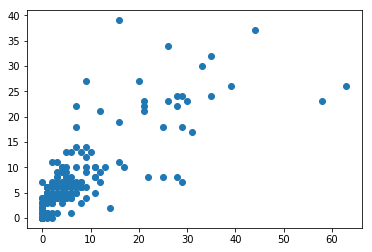

In [5]:
# total cases is rightmost column
#dfx_iq = dfx_train_iq.iloc[:,:-1].copy()
dfx_iq = dfx_train_iq.copy()

#pca = PCA(n_components=10)
#dfx_iq = pd.DataFrame(pca.fit_transform(dfx_iq.values))

do_scale = 0
periods_iq = 1
X_iq, scaler_iq, scaler_tc_iq = myutil.preprocess(dfx_iq, do_scale, periods_iq)
y_iq = dfy_train_iq.values[periods_iq:,:]
regr_iq = rfr_run(X_iq, y_iq, 2, exploring=True)

(626, 19) (309, 19) (626, 1) (309, 1)
Train mea: 4.908545512855319
Valid mea: 9.388349514563107
Variance score: 0.88
Feature Importances:
[  1.61865377e-03   2.36557338e-03   4.21717343e-03   2.26094640e-03
   3.57893507e-03   2.03580492e-03   1.71370576e-03   7.84346221e-03
   1.29074525e-03   1.73147293e-03   3.46304332e-03   2.13319763e-03
   1.87544713e-03   2.63107601e-03   3.28629603e-03   7.85804588e-04
   1.04498575e-03   2.64285283e-03   9.53480824e-01]


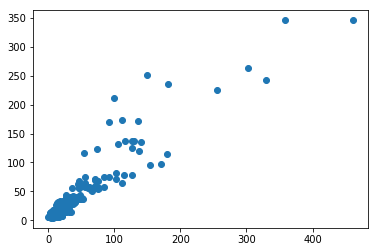

In [6]:
# total cases is rightmost column
#dfx_sj = dfx_train_sj.iloc[:,:-1].copy()
dfx_sj = dfx_train_sj.copy()

#pca = PCA(n_components=3)
#dfx_sj = pd.DataFrame(pca.fit_transform(dfx_sj.values))

do_scale = 0
periods_sj = 1
X_sj, scaler_sj, scaler_tc_sj = myutil.preprocess(dfx_sj, do_scale, periods_sj)
y_sj = dfy_train_sj.values[periods_sj:,:]
regr_sj = rfr_run(X_sj, y_sj, 2, exploring=True)

## Get test dataset and create predictions

In [7]:
dfx_test_iq = pd.read_csv('data/dengue_features_test_with_outliers_iq.csv')
dfx_test_iq.set_index('yearweekofyear', inplace=True)
dfx_test_sj = pd.read_csv('data/dengue_features_test_with_outliers_sj.csv')
dfx_test_sj.set_index('yearweekofyear', inplace=True)

### Predict San Juan first

In [8]:
# first prediction will require periods_sj data from training dataset along with training labels
feature_count_sj = len(dfx_train_sj.columns)
df_last_train_sj = dfx_train_sj.iloc[-periods_sj:,:].values.reshape(1,periods_sj*feature_count_sj)

#X_last_train_sj = scaler_sj.transform(df_last_train_sj)

# predict, scale, set to zero if needed
#y_pred = max([[0]],scaler_tc_sj.transform(y_sj[-1:,:]))
y_pred = max([[0]],y_sj[-1:,:])

#print(scaler_tc_sj.transform(regr_sj.predict(X_last_train_sj).reshape(1,1)))

# now, for every row in test dataset, append prior prediction to get a new one
predictions_sj = list()
sick_sj = y_pred
nptest_sj = dfx_test_sj.values
for i in range(0, nptest_sj.shape[0]):
    #print(sick_sj)
    #X_sj = scaler_sj.transform(np.hstack((nptest_sj[i:i+1], sick_sj)))
    #sick_sj = max([[0]],scaler_tc_sj.transform(regr_sj.predict(X_sj).reshape(1,1)))
    X_sj = np.hstack((nptest_sj[i:i+1], sick_sj))
    #print(X_sj)
    sick_sj = max([[0]],regr_sj.predict(X_sj).reshape(1,1))
    predictions_sj.append(int(round(sick_sj[0][0])))
np_predictions_sj = np.array(predictions_sj).reshape(len(predictions_sj),1)

### Predict Iquito

In [9]:
# first prediction will require periods_sj data from training dataset along with training labels
feature_count_iq = len(dfx_train_iq.columns)
df_last_train_iq = dfx_train_iq.iloc[-periods_iq:,:].values.reshape(1,periods_iq*feature_count_iq)

#X_last_train_iq = scaler_iq.transform(df_last_train_iq)

# predict, scale, set to zero if needed
#y_pred = max([[0]],scaler_tc_iq.transform(y_iq[-1:,:]))
y_pred = max([[0]],y_iq[-1:,:])

#print(scaler_tc_iq.transform(regr_iq.predict(X_last_train_iq).reshape(1,1)))

# now, for every row in test dataset, append prior prediction to get a new one
predictions_iq = list()
sick_iq = y_pred
nptest_iq = dfx_test_iq.values
for i in range(0, nptest_iq.shape[0]):
    #print(sick_iq)
    #X_iq = scaler_sj.transform(np.hstack((nptest_iq[i:i+1], sick_iq)))
    #sick_iq = max([[0]],scaler_tc_iq.transform(regr_iq.predict(X_iq).reshape(1,1)))
    X_iq = np.hstack((nptest_iq[i:i+1], sick_iq))
    #print(X_iq)
    sick_iq = max([[0]],regr_iq.predict(X_iq).reshape(1,1))
    predictions_iq.append(int(round(sick_iq[0][0])))
np_predictions_iq = np.array(predictions_iq).reshape(len(predictions_iq),1)

In [10]:
dfsubm = pd.read_csv('data/submission_format.csv')
npsubm_sj = np.concatenate((dfsubm[dfsubm['city']=='sj'][['city','year','weekofyear']].values, \
                            np_predictions_sj), axis=1)
npsubm_iq = np.concatenate((dfsubm[dfsubm['city']=='iq'][['city','year','weekofyear']].values, \
                            np_predictions_iq), axis=1)
dfresults = pd.DataFrame(np.concatenate((npsubm_sj, npsubm_iq), axis=0), columns=dfsubm.columns)
dfresults.to_csv("data/submission_20171123_ada.csv", index=False)